In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

from mpl_toolkits.mplot3d import Axes3D  # for 3D plot
import statsmodels.formula.api as smf    # for OLS regression

Populating the interactive namespace from numpy and matplotlib


## EX1,  Artificial data

In [2]:
path1 = 'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/H31.csv'

In [3]:
ex1 = pd.read_csv(path1, index_col=0)
ex1

,y,x1,x2,x3
1,0,1,-2,1
2,2,1,-1,-1
3,2,1,0,0
4,3,1,1,-1
5,3,1,2,1


### EX1.(a)

x1 serves as dummy variable corresponding to an intercept term.

### EX1.(b)

In [4]:
X = np.matrix(ex1.loc[:,['x1','x2','x3']])
Y = np.matrix(ex1.y).T
w = (X.T * X).I * X.T * Y
print(w)

[[ 2. ]
 [ 0.7]
 [-0.5]]


###  EX1.(c)

In [5]:
lm1 = smf.ols(formula = 'y ~ x2 + x3', data = ex1).fit()
print('R2 = %f'%lm1.rsquared)
print(lm1.params)

R2 = 0.983333
Intercept    2.0
x2           0.7
x3          -0.5
dtype: float64


### EX1.(d)

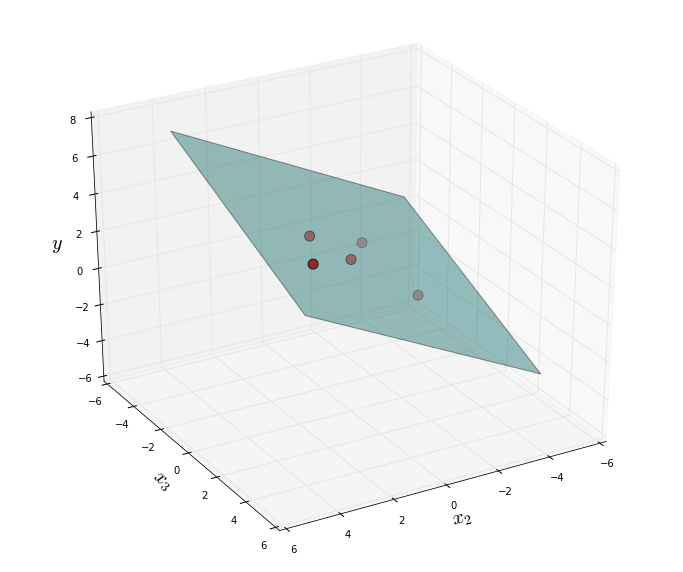

In [6]:
fig = plt.figure(figsize = (12,10))  
ax = fig.gca(projection='3d')  
ax.scatter(ex1.x2, ex1.x3, ex1.y, s = 100,  c = 'r')

radius = 5
x2, x3 = np.meshgrid(range(-radius,radius), range(-radius,radius))
fit_y = lm1.params[0] + lm1.params[1] * x2 + lm1.params[2] * x3

# alpha (between 0 and 1) controls the transparency with 0 being totally transparent
ax.plot_surface(x2, x3, fit_y, color='c', alpha = 0.4)
# Set labels and fontsize
ax.set_xlabel('$x_2$', fontsize = 20)
ax.set_ylabel('$x_3$', fontsize = 20)
ax.set_zlabel('$y$', fontsize = 20)

ax.view_init(azim = 60)   # Controls the viewing angle

## EX2, Income vs Insurance coverage

In [7]:
path2 = 'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/IncomeInsReg.csv'

In [8]:
ex2 = pd.read_csv(path2)
ex2.head()

,Zipcode,IncomePerCapita,TotalPop,NoCoverage,WithCoverage,Public,Private
0,10001,77512.0,22767,1958,20809,5800,16795
1,10002,26905.0,79490,9129,70361,40139,35167
2,10003,79088.0,56909,3774,53135,8593,48522
3,10004,98020.0,3024,244,2780,180,2705
4,10005,99633.0,7566,570,6996,122,6944


### EX2.(a) create a column of the population with BOTH public insurance and private insurance.

In [9]:
ex2["Both"] = ex2["Public"] + ex2["Private"] - ex2["WithCoverage"]
ex2.head()

,Zipcode,IncomePerCapita,TotalPop,NoCoverage,WithCoverage,Public,Private,Both
0,10001,77512.0,22767,1958,20809,5800,16795,1786
1,10002,26905.0,79490,9129,70361,40139,35167,4945
2,10003,79088.0,56909,3774,53135,8593,48522,3980
3,10004,98020.0,3024,244,2780,180,2705,105
4,10005,99633.0,7566,570,6996,122,6944,70


### EX2.(b)

In [10]:
ex2_a = ex2.loc[:,["IncomePerCapita","TotalPop","NoCoverage","Both"]]
ex2_a["PublicOnly"] = ex2["Public"] - ex2["Both"]
ex2_a["PrivateOnly"] = ex2["Private"] - ex2["Both"]
ex2_a.head()

,IncomePerCapita,TotalPop,NoCoverage,Both,PublicOnly,PrivateOnly
0,77512.0,22767,1958,1786,4014,15009
1,26905.0,79490,9129,4945,35194,30222
2,79088.0,56909,3774,3980,4613,44542
3,98020.0,3024,244,105,75,2600
4,99633.0,7566,570,70,52,6874


### EX2.(c)

In [11]:
ex2_a.dropna(inplace = True)
ex2_a.head()

,IncomePerCapita,TotalPop,NoCoverage,Both,PublicOnly,PrivateOnly
0,77512.0,22767,1958,1786,4014,15009
1,26905.0,79490,9129,4945,35194,30222
2,79088.0,56909,3774,3980,4613,44542
3,98020.0,3024,244,105,75,2600
4,99633.0,7566,570,70,52,6874


In [12]:
ex2_a = pd.concat([ex2_a.IncomePerCapita, ex2_a.iloc[:,2:].div(ex2_a.TotalPop, axis = 0) * 100], axis = 1)
ex2_a.head()

,IncomePerCapita,NoCoverage,Both,PublicOnly,PrivateOnly
0,77512.0,8.600167,7.844687,17.630781,65.924364
1,26905.0,11.484463,6.220908,44.274752,38.019877
2,79088.0,6.631640,6.993621,8.105923,78.268815
3,98020.0,8.068783,3.472222,2.480159,85.978836
4,99633.0,7.533703,0.925192,0.687285,90.853820


### EX2.(d)

In [13]:
lm2 = smf.ols(formula = 'IncomePerCapita ~ Both + PublicOnly + PrivateOnly', data = ex2_a).fit()
print('R2 = %f'%lm2.rsquared)
print(lm2.params)

R2 = 0.622215
Intercept     -63030.644620
Both             911.096431
PublicOnly       385.776670
PrivateOnly     1621.503140
dtype: float64


There are 

### EX2.(e)

In [14]:
ex2_a["pred"] = lm2.params[0] + lm2.params[1] * ex2_a["Both"] + lm2.params[2] * ex2_a["PublicOnly"] + \
lm2.params[3] * ex2_a["PrivateOnly"]
ex2_a.head()

,IncomePerCapita,NoCoverage,Both,PublicOnly,PrivateOnly,pred
0,77512.0,8.600167,7.844687,17.630781,65.924364,57814.729834
1,26905.0,11.484463,6.220908,44.274752,38.019877,21366.718386
2,79088.0,6.631640,6.993621,8.105923,78.268815,73381.424511
3,98020.0,8.068783,3.472222,2.480159,85.978836,80504.624518
4,99633.0,7.533703,0.925192,0.687285,90.853820,85397.186722


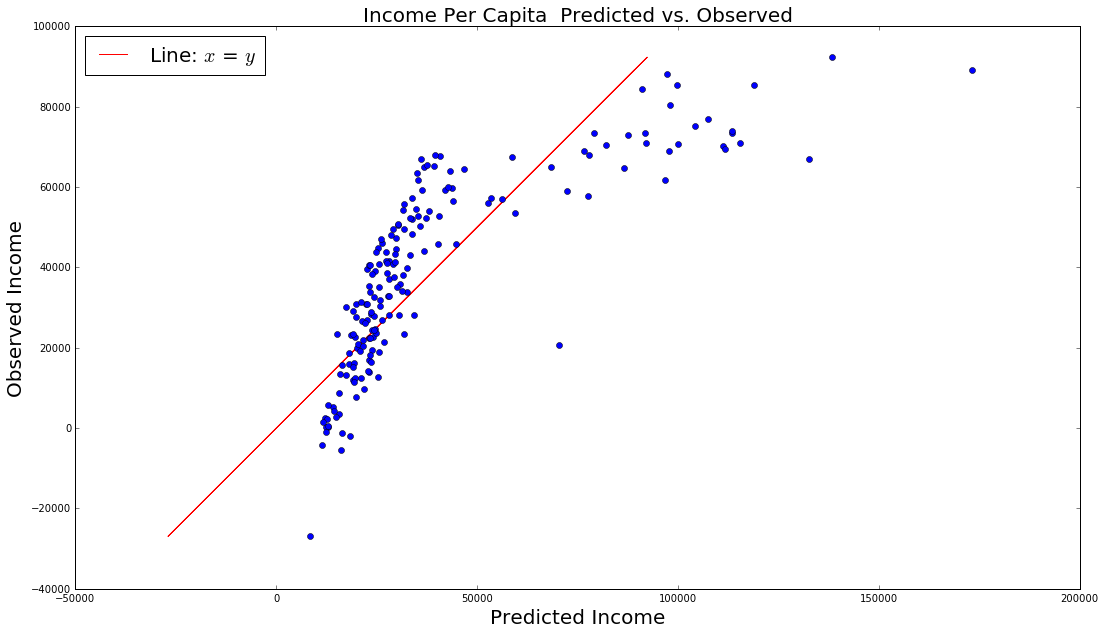

In [15]:
plt.figure(figsize = (18,12))
plt.gca().set_aspect('equal', adjustable='box')

plt.plot(ex2_a.pred, ex2_a.pred, 'r', label = 'Line: $x$ = $y$')
plt.plot(ex2_a.IncomePerCapita, ex2_a.pred, 'o', label = 'point')
plt.xlabel("Predicted Income", fontsize = 20)
plt.ylabel("Observed Income", fontsize = 20)
plt.title("Income Per Capita  Predicted vs. Observed", fontsize = 20)
plt.legend(["Line: $x$ = $y$"], loc = "upper left", fontsize = 20)

In [16]:
ex2_a.corr()

,IncomePerCapita,NoCoverage,Both,PublicOnly,PrivateOnly,pred
IncomePerCapita,1.000000,-0.602753,0.101578,-0.746417,0.778040,0.788806
NoCoverage,-0.602753,1.000000,-0.344447,0.556389,-0.679430,-0.764133
Both,0.101578,-0.344447,1.000000,-0.201309,-0.024644,0.128774
PublicOnly,-0.746417,0.556389,-0.201309,1.000000,-0.940209,-0.946262
PrivateOnly,0.778040,-0.679430,-0.024644,-0.940209,1.000000,0.986351
pred,0.788806,-0.764133,0.128774,-0.946262,0.986351,1.000000


This fitted line look great.

## EX3, Polynomial fit

In [17]:
path3 = 'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/H33.csv'

In [18]:
ex3 = pd.read_csv(path3)
ex3

,y,x1
0,2.613388,-0.50
1,2.170351,-0.32
2,0.049546,-0.14
3,1.158258,0.04
4,1.397567,0.22
5,1.773240,0.40


### EX3.(a)

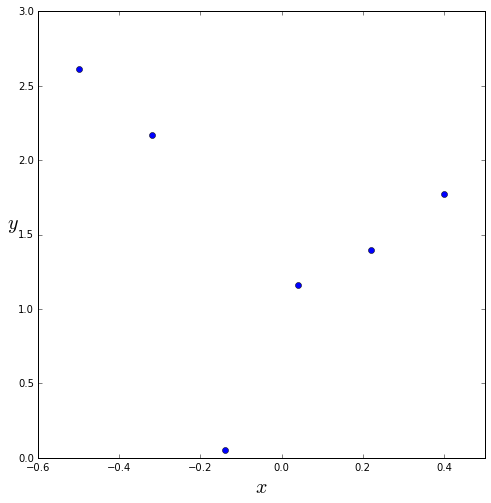

In [19]:
plt.figure(figsize = (8,8))

plt.plot(ex3.x1, ex3.y, 'o')
plt.xlim(-0.6, 0.5)
plt.xlabel('$x$', fontsize = 20)
plt.ylabel('$y$', fontsize = 20, rotation = 0)

Guess: Binomial polynomial could be the best choice.

### EX3.(b)

In [20]:
for i in {2, 3, 4}:
    ex3["x%d"%i] = ex3["x1"] ** i
ex3

,y,x1,x2,x3,x4
0,2.613388,-0.50,0.2500,-0.125000,0.062500
1,2.170351,-0.32,0.1024,-0.032768,0.010486
2,0.049546,-0.14,0.0196,-0.002744,0.000384
3,1.158258,0.04,0.0016,0.000064,0.000003
4,1.397567,0.22,0.0484,0.010648,0.002343
5,1.773240,0.40,0.1600,0.064000,0.025600


### EX3.(c)

In [21]:
param3 = pd.DataFrame(np.zeros([4,6]))
param3.columns = ["Intercept", "x1", "x2", "x3", "x4", "Rsquare"]
fa = 'y ~ x'
R2 = []; Params = []
for i in {1, 2, 3, 4}:
    fa += str(i)
    lm3 = smf.ols(formula = fa, data = ex3).fit()
    for j in range(i + 1):
        param3.iloc[i - 1, j] = lm3.params[j]
    param3.iloc[i - 1, 5] = lm3.rsquared
    fa += ' + x'
    R2.append(lm3.rsquared)
    Params.append(lm3.params)

param3.index = ("M = 1", "M = 2", "M = 3", "M = 4")
param3

,Intercept,x1,x2,x3,x4,Rsquare
M = 1,1.484119,-0.858791,0.000000,0.000000,0.000000,0.104796
M = 2,0.797871,-0.112869,7.459218,0.000000,0.000000,0.651259
M = 3,0.839133,0.686771,6.690924,-5.121962,0.000000,0.665749
M = 4,0.469719,2.350384,22.552763,-20.607719,-77.428785,0.801986


### Ex3.(d)

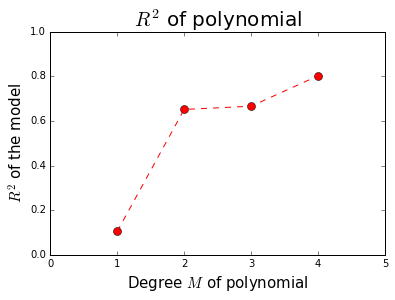

In [22]:
plt.plot(range(1, 5), R2, 'ro--', markersize = 8)
plt.xlim(0, 5)
plt.ylim(0, 1)
plt.xlabel('Degree $M$ of polynomial', fontsize = 15)
plt.ylabel('$R^2$ of the model', fontsize = 15)
plt.title('$R^2$ of polynomial', fontsize = 20)
plt.show()

### Ex3.(e) with Extra credit (g)

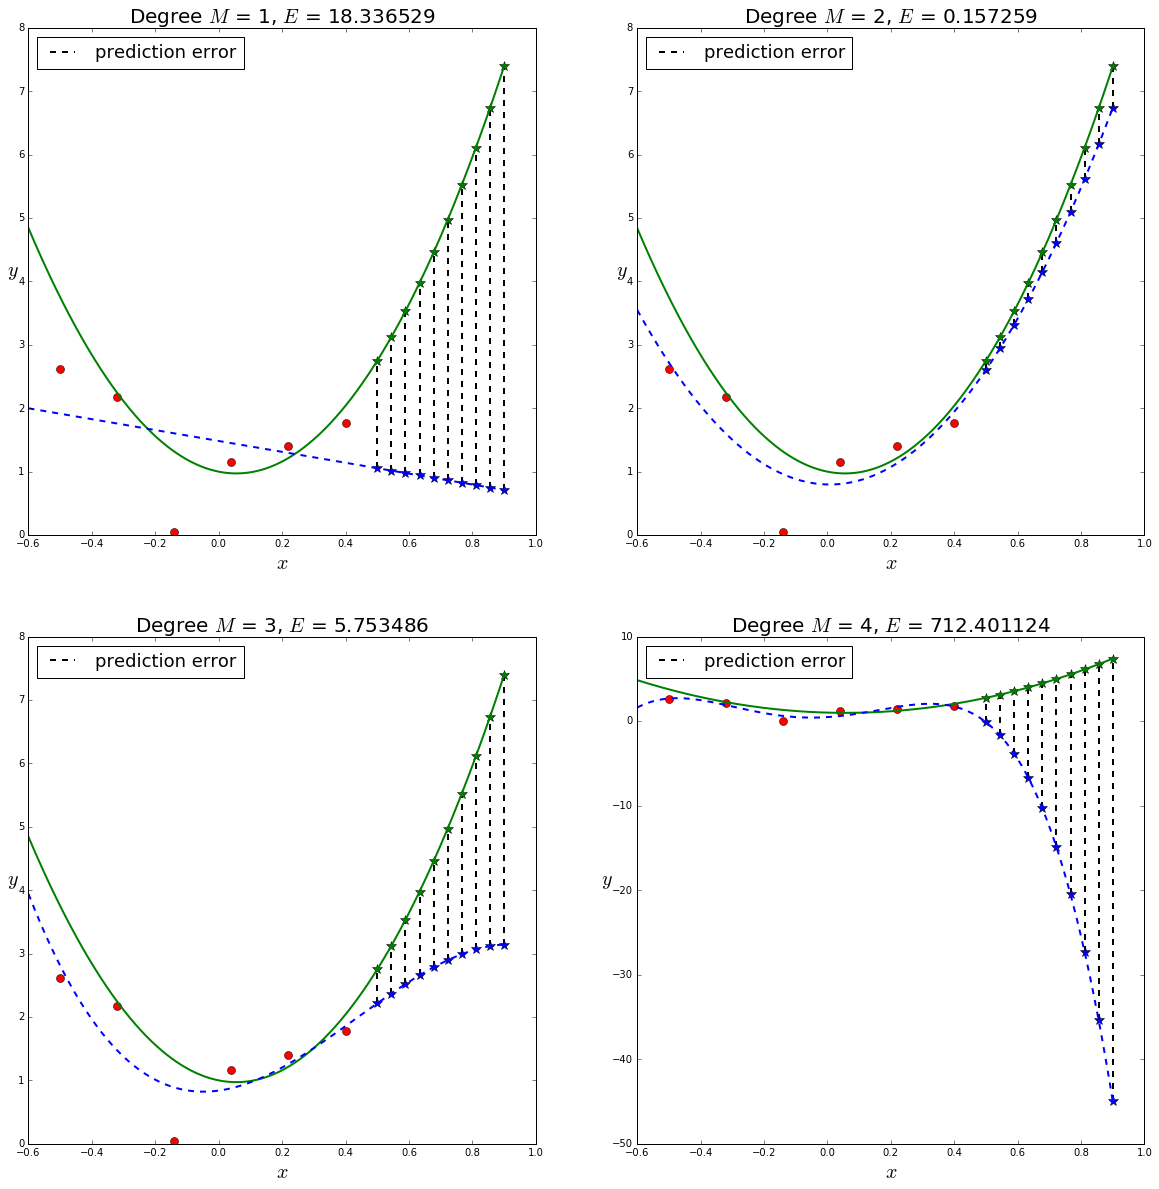

In [23]:
plt.figure(figsize = (20,20))

f = lambda x: 9 * x ** 2 - x + 1

for M in range(1, 5):
    plt.subplot(2, 2, M)
    x_fit = np.linspace(-0.6, 0.9, 1000)  
    y_fit = pd.DataFrame(np.matrix([x_fit ** k for k in range(M + 1)]).T, \
                         columns = Params[M - 1].index).mul(Params[M - 1], 1).sum(1)

    time = 10
    x_future = np.linspace(0.5, 0.9, time)
    y_future = np.zeros(time)
    Error = 0
    for j in range(time):
        for i in range(M + 1):
            y_future[j] += Params[M - 1][i] * (x_future[j] ** i)
        Error += (y_future[j] - f(x_future[j])) ** 2
    Error /= time
    
    plt.plot([x_future,x_future], [y_future, f(x_future)], 'k--', lw = 2, label = 'prediction error')         
    plt.plot(x_future, y_future, 'b*', markersize = 10)
    plt.plot(x_future, f(x_future), 'g*', markersize = 10)   
        
    plt.plot(ex3.x1, ex3.y, 'ro', markersize = 8)
    plt.plot(x_fit, f(x_fit), 'g-', lw = 2)
    plt.plot(x_fit, y_fit, 'b--', lw = 2)
    plt.title('Degree $M$ = %d, $E$ = %f'%(M, Error), fontsize = 20)
    plt.xlabel('$x$', fontsize = 20)
    plt.ylabel('$y$', fontsize = 20, rotation = 0)
    plt.legend(["prediction error"], loc = "upper left", fontsize = 18)

### EX3.(f) with Extra credit (g)

When Degree M =2, the model fits the true curve best. At the same time, ths model has the smallest average error $E$

In [24]:
ex3['x0'] = 1
X = np.matrix(ex3.loc[:,['x0','x1','x2']])
Y = np.matrix(ex3.y).T
w = (X.T * X).I * X.T * Y
print(w)

[[ 0.79787069]
 [-0.1128695 ]
 [ 7.4592179 ]]
